In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tqdm import tqdm
from cv2 import imread, createCLAHE
import cv2
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt
import os

In [ ]:
import shutil
import os

# set the path of the folder to be deleted
folder_path = "/content/mask_numpy"

# check if the folder exists
if os.path.exists(folder_path):
    # use shutil.rmtree() to delete the folder and its contents
    shutil.rmtree(folder_path)
    print("Folder deleted successfully.")
else:
    print("Folder does not exist.")

Folder deleted successfully.


In [ ]:
image_path = os.path.join("/content/drive/MyDrive/ColabNotebooks/ImageSegmentation/Lung Segmentation/data/Lung Segmentation/CXR_png/")
mask_path = os.path.join("/content/drive/MyDrive/ColabNotebooks/ImageSegmentation/Lung Segmentation/data/Lung Segmentation/masks/")
aug_img_path = os.path.join("/content/drive/MyDrive/ColabNotebooks/ImageSegmentation/Lung Segmentation/data/Lung Segmentation/aug_img/")
aug_mask_path = os.path.join("/content/drive/MyDrive/ColabNotebooks/ImageSegmentation/Lung Segmentation/data/Lung Segmentation/aug_masks/")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import cv2
import numpy as np

# Define the path to the original images
#image_path = '/path/to/original/images'

# Define the path to the folder where the numpy arrays will be saved
numpy_path = 'image_numpy'

# Loop through the images in the image_path folder
for filename in os.listdir(image_path):
    # Check if the file is an image
    if filename.endswith(".png"):
        print(filename)
        # Read the image
        img=cv2.imread(os.path.join(image_path, filename))
        img = cv2.resize(img,(128,128))[:,:,0]
        
        # Convert the image to numpy array
        np_img = np.array(img).reshape(1,128,128,1)

        # Save the numpy array to the numpy_path folder
        np.save(os.path.join(numpy_path, filename.split(".")[0] + ".npy"), np_img)

In [ ]:
# Define the path to the folder where the numpy arrays will be saved
mask_numpy_path = 'mask_numpy'

# Loop through the images in the image_path folder
for filename in os.listdir(mask_path):
    # Check if the file is an image
    if filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
        # Read the image
        mask = cv2.resize(cv2.imread(os.path.join(mask_path, filename)), (128,128))[:,:,0]
        
        # Convert the image to numpy array
        np_mask = np.array(mask).reshape(1,128,128,1)

        # Save the numpy array to the numpy_path folder
        np.save(os.path.join(mask_numpy_path, filename.split(".")[0] + ".npy"), np_mask)

In [ ]:
!cp -r mask_numpy '/content/drive/MyDrive/ColabNotebooks/ImageSegmentation/Lung Segmentation'

In [ ]:
!cp -r image_numpy '/content/drive/MyDrive/ColabNotebooks/ImageSegmentation/Lung Segmentation'

In [ ]:
!cp -r result_numpy '/content/drive/MyDrive/ColabNotebooks/ImageSegmentation/Lung Segmentation/result_numpy2/'

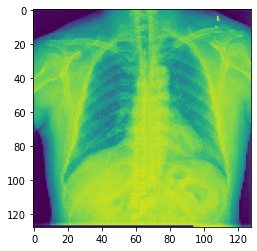

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numpy file
img = np.load('image_numpy/CHNCXR_0001_0.npy')
img = np.squeeze(img)

# Display the image
plt.imshow(img)
plt.show()

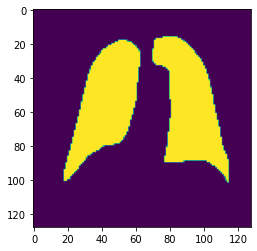

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numpy file
img = np.load('mask_numpy/CHNCXR_0001_0_mask.npy')
img = np.squeeze(img)

# Display the image
plt.imshow(img)
plt.show()

In [3]:
!pip install tflite_runtime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 68.5 MB/s eta 0:00:00


In [4]:
import numpy as np
import tflite_runtime.interpreter as tflite
import os
import time
import platform
import argparse

_EDGETPU_SHARED_LIB = {
  'Linux': 'libedgetpu.so.1',
  'Darwin': 'libedgetpu.1.dylib',
  'Windows': 'edgetpu.dll'
}[platform.system()]

In [5]:
model_path = "model.tflite"

In [6]:
if 'edgetpu.tflite'  in model_path:
    interpreter = tflite.Interpreter(
        model_path=model_path, experimental_delegates=[tflite.load_delegate(_EDGETPU_SHARED_LIB,  {})])
else:
    interpreter = tflite.Interpreter(model_path=model_path)

interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_shape = input_details[0]['shape']
#input_data = np.array(np.random.random_sample(input_shape), dtype=input_details[0]['dtype'])
input_data=np.load('image_numpy/CHNCXR_0002_0.npy')
input_data=np.float32(input_data)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
output_img=output_data[0,:,:,0]
np.save("CHNCXR_0002_0_result.npy",output_img)

In [8]:
import os
import numpy as np

folder = "image_numpy"

if 'edgetpu.tflite'  in model_path:
    interpreter = tflite.Interpreter(
        model_path=model_path, experimental_delegates=[tflite.load_delegate(_EDGETPU_SHARED_LIB,  {})])
else:
    interpreter = tflite.Interpreter(model_path=model_path)

interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

for filename in os.listdir(folder):
    if filename.endswith(".npy"):
        # load the numpy array from the file
        input_data = np.load(os.path.join(folder, filename))
        # perform some operation on the array
        input_data = np.float32(input_data)
        interpreter.set_tensor(input_details[0]['index'], input_data)

        interpreter.invoke()

        output_data = interpreter.get_tensor(output_details[0]['index'])
        output_img = output_data[0,:,:,0]
        # construct the new filename with "_result" added before ".npy"
        new_filename = filename.replace(".npy", "_result.npy")
        # save the result array to the new file
        np.save(os.path.join("result_numpy/", new_filename), output_img)

In [ ]:
!zip -r FolderName.zip result_numpy


In [10]:
from google.colab import files


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
files.download('FolderName.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
for i in range(1, 70):
    filename = "CHNCXR_00{}_0".format(str(i).zfill(2))
    input_data = np.load("image_numpy/{}.npy".format(filename))
    input_data = np.float32(input_data)
    interpreter.set_tensor(input_details[0]['index'], input_data)

    interpreter.invoke()

    output_data = interpreter.get_tensor(output_details[0]['index'])
    output_img = output_data[0,:,:,0]
    np.save("result_numpy/{}_result.npy".format(filename), output_img)

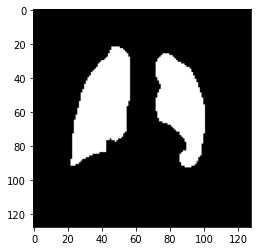

In [ ]:
import matplotlib.pyplot as plt
arr = np.load("result_numpy/CHNCXR_0002_0_result.npy")
plt.imshow(arr, cmap="gray")
plt.show()

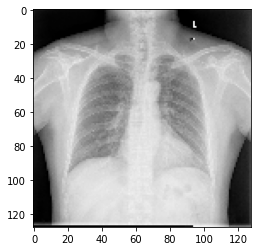

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numpy file
img = np.load('image_numpy/CHNCXR_0002_0.npy')
img = np.squeeze(img)

# Display the image
plt.imshow(img, cmap="gray")
plt.show()

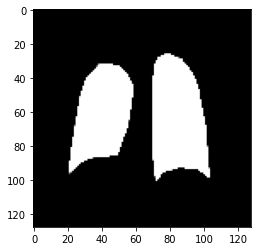

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load the numpy file
img = np.load('mask_numpy/CHNCXR_0002_0.npy')
img = np.squeeze(img)

# Display the image
plt.imshow(img, cmap="gray")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for i in range(9):
    plt.subplot(1,2,1)
    mask = np.load("mask_numpy/CHNCXR_000{}_0_mask.npy".format(i + 1))
    mask = np.squeeze(mask)
    plt.imshow(mask)
    plt.title("Mask")

    plt.subplot(1,2,2)
    result = np.load("result_numpy/CHNCXR_000{}_0_result.npy".format(i + 1))
    plt.imshow(result)
    plt.title("Result from Coral Dev Board Mini")
    
    plt.savefig(f"Result_for_inference_{i}.png")
    plt.show()

In [ ]:
for i in range(1,8):
    # Load the real mask and the predicted mask
    real_mask = np.load(f"mask_numpy/CHNCXR_000{i}_0_mask.npy")
    real_mask = np.squeeze(real_mask)
    predicted_mask = np.load(f"result_numpy/CHNCXR_000{i}_0_result.npy")

    real_mask[real_mask > 0.5] = 1
    real_mask[real_mask <= 0.5] = 0
    predicted_mask[predicted_mask > 0.5] = 1
    predicted_mask[predicted_mask <= 0.5] = 0

    plt.subplot(1,2,1)
    plt.imshow(real_mask)
    plt.title("Mask")

    plt.subplot(1,2,2)
    plt.imshow(predicted_mask)
    plt.title("Result from Coral Dev Board Mini")
    
    plt.show()

# Calculate Dice Score

In [ ]:
import os
import numpy as np
from sklearn.metrics import f1_score

real_mask_folder = 'mask_numpy'
predicted_mask_folder = 'result_numpy'

real_mask_files = sorted(os.listdir(real_mask_folder))
predicted_mask_files = sorted(os.listdir(predicted_mask_folder))

dice_scores = []

for i, file in enumerate(real_mask_files):
    # print(file)
    # print(predicted_mask_files[i])
    real_mask_path = os.path.join(real_mask_folder, file)
    predicted_mask_path = os.path.join(predicted_mask_folder, predicted_mask_files[i])
    
    # Load real and predicted mask data from numpy files
    real_mask = np.load(real_mask_path)
    real_mask = np.squeeze(real_mask)
    predicted_mask = np.load(predicted_mask_path)

    # print(real_mask_data.shape)
    # print(predicted_mask_data.shape)

    # real_mask_data = real_mask_data.astype(np.int32)
    # predicted_mask_data = predicted_mask_data.astype(np.int32)

    real_mask[real_mask > 0.5] = 1
    real_mask[real_mask <= 0.5] = 0
    predicted_mask[predicted_mask > 0.5] = 1
    predicted_mask[predicted_mask <= 0.5] = 0
    
    # Calculate the Dice score for the current mask
    dice_score = f1_score(real_mask.flatten(), predicted_mask.flatten(),labels=[0, 1], average='binary')
    dice_scores.append(dice_score)

# Calculate the average Dice score over all masks
average_dice_score = np.mean(dice_scores)
print(f'Average Dice score: {average_dice_score}')

Average Dice score: 0.9045258998146042


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

num_masks = 8
dice_scores = []

for i in range(1,num_masks):
    # Load the real mask and the predicted mask
    real_mask = np.load(f"mask_numpy/CHNCXR_"+str(i).zfill(4)+"_0.npy")
    real_mask = np.squeeze(real_mask)
    predicted_mask = np.load(f"result_numpy/CHNCXR_"+str(i).zfill(4)+"_0_result.npy")

    real_mask[real_mask > 0.5] = 1
    real_mask[real_mask <= 0.5] = 0
    predicted_mask[predicted_mask > 0.5] = 1
    predicted_mask[predicted_mask <= 0.5] = 0
    
    # Calculate the Jaccard score for the current mask
    dice_score = f1_score(real_mask.flatten(), predicted_mask.flatten(), average='binary')
    dice_scores.append(dice_score)

In [ ]:
# Calculate the average Jaccard score over all masks
average_dice_score = np.mean(dice_scores)
print(f'Average Dice score: {average_dice_score}')

# Calculate Jaccard Score

In [ ]:
import os
import numpy as np
from sklearn.metrics import jaccard_score

real_mask_folder = 'mask_numpy'
predicted_mask_folder = 'result_numpy'

real_mask_files = sorted(os.listdir(real_mask_folder))
predicted_mask_files = sorted(os.listdir(predicted_mask_folder))

jaccard_scores = []

for i, file in enumerate(real_mask_files):
    real_mask_path = os.path.join(real_mask_folder, file)
    predicted_mask_path = os.path.join(predicted_mask_folder, predicted_mask_files[i])
    
    # Load real and predicted mask data from numpy files
    real_mask = np.load(real_mask_path)
    real_mask = np.squeeze(real_mask)
    predicted_mask = np.load(predicted_mask_path)

    real_mask[real_mask > 0.5] = 1
    real_mask[real_mask <= 0.5] = 0
    predicted_mask[predicted_mask > 0.5] = 1
    predicted_mask[predicted_mask <= 0.5] = 0
    
    # Calculate the Dice score for the current mask
    jaccard = jaccard_score(real_mask.flatten(), predicted_mask.flatten(), average='binary')
    jaccard_scores.append(jaccard)

# Calculate the average Dice score over all masks
average_jaccard_score = np.mean(jaccard_scores)
print(f'Average Jaccard score: {average_jaccard_score}')

Average Jaccard score: 0.8320461880686199


In [ ]:
import numpy as np
from sklearn.metrics import jaccard_score

num_masks = 8
jaccard_scores = []

for i in range(1,num_masks):
    # Load the real mask and the predicted mask
    real_mask = np.load(f"mask_numpy/CHNCXR_"+str(i).zfill(4)+"_0.npy")
    real_mask = np.squeeze(real_mask)
    predicted_mask = np.load(f"result_numpy/CHNCXR_"+str(i).zfill(4)+"_0_result.npy")

    real_mask[real_mask > 0.5] = 1
    real_mask[real_mask <= 0.5] = 0
    predicted_mask[predicted_mask > 0.5] = 1
    predicted_mask[predicted_mask <= 0.5] = 0
    
    # Calculate the Jaccard score for the current mask
    score = jaccard_score(real_mask.flatten(), predicted_mask.flatten())
    jaccard_scores.append(score)

In [ ]:
# Calculate the average Jaccard score over all masks
average_jaccard_score = np.mean(jaccard_scores)
print(f'Average Jaccard score: {average_jaccard_score}')

Average Jaccard score: 0.7183596905777263


# Calculate Accuracy

In [ ]:
import os
import numpy as np
from sklearn.metrics import accuracy_score

real_mask_folder = 'mask_numpy'
predicted_mask_folder = 'result_numpy'

real_mask_files = sorted(os.listdir(real_mask_folder))
predicted_mask_files = sorted(os.listdir(predicted_mask_folder))

accuracy_scores = []

for i, file in enumerate(real_mask_files):
    real_mask_path = os.path.join(real_mask_folder, file)
    predicted_mask_path = os.path.join(predicted_mask_folder, predicted_mask_files[i])
    
    # Load real and predicted mask data from numpy files
    real_mask = np.load(real_mask_path)
    real_mask = np.squeeze(real_mask)
    predicted_mask = np.load(predicted_mask_path)

    real_mask[real_mask > 0.5] = 1
    real_mask[real_mask <= 0.5] = 0
    predicted_mask[predicted_mask > 0.5] = 1
    predicted_mask[predicted_mask <= 0.5] = 0
    
    # Calculate the Dice score for the current mask
    accuracy = accuracy_score(real_mask.flatten(), predicted_mask.flatten())
    accuracy_scores.append(accuracy)

# Calculate the average Dice score over all masks
average_accuracy_score = np.mean(accuracy_scores)
print(f'Average Accuracy score: {average_accuracy_score}')

Average Accuracy score: 0.9553370884486607


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

num_masks = 8
accuracy_scores = []

for i in range(1, num_masks):
    # Load the real mask and the predicted mask
    real_mask = np.load(f"mask_numpy/CHNCXR_000{i}_0_mask.npy")
    real_mask = np.squeeze(real_mask)
    predicted_mask = np.load(f"result_numpy/CHNCXR_000{i}_0_result.npy")

    # Binarize the masks
    real_mask[real_mask > 0.5] = 1
    real_mask[real_mask <= 0.5] = 0
    predicted_mask[predicted_mask > 0.5] = 1
    predicted_mask[predicted_mask <= 0.5] = 0
    
    # Calculate the accuracy score for the current mask
    accuracy = accuracy_score(real_mask.flatten(), predicted_mask.flatten())
    accuracy_scores.append(accuracy)

In [ ]:
# Calculate the average Jaccard score over all masks
average_accuracy_score = np.mean(accuracy_scores)
print(f'Average Accuracy score: {average_accuracy_score}')

Average Accuracy score: 0.9264613560267857


In [ ]:
import os
import numpy as np
from sklearn.metrics import recall_score

real_mask_folder = 'mask_numpy'
predicted_mask_folder = 'result_numpy'

real_mask_files = sorted(os.listdir(real_mask_folder))
predicted_mask_files = sorted(os.listdir(predicted_mask_folder))

recall_scores = []

for i, file in enumerate(real_mask_files):
    real_mask_path = os.path.join(real_mask_folder, file)
    predicted_mask_path = os.path.join(predicted_mask_folder, predicted_mask_files[i])
    
    # Load real and predicted mask data from numpy files
    real_mask = np.load(real_mask_path)
    real_mask = np.squeeze(real_mask)
    predicted_mask = np.load(predicted_mask_path)

    real_mask[real_mask > 0.5] = 1
    real_mask[real_mask <= 0.5] = 0
    predicted_mask[predicted_mask > 0.5] = 1
    predicted_mask[predicted_mask <= 0.5] = 0
    
    # Calculate the Dice score for the current mask
    recall = recall_score(real_mask.flatten(), predicted_mask.flatten(), average='binary')
    recall_scores.append(recall)

# Calculate the average Dice score over all masks
average_recall_score = np.mean(recall_scores)
print(f'Average Recall score: {average_recall_score}')

Average Recall score: 0.8744300685953601


In [ ]:
import numpy as np
from sklearn.metrics import recall_score

num_masks = 8
recall_scores = []

for i in range(1,num_masks):
    # Load the real mask and the predicted mask
    real_mask = np.load(f"mask_numpy/CHNCXR_000{i}_0_mask.npy")
    real_mask = np.squeeze(real_mask)
    predicted_mask = np.load(f"result_numpy/CHNCXR_000{i}_0_result.npy")

    real_mask[real_mask > 0.5] = 1
    real_mask[real_mask <= 0.5] = 0
    predicted_mask[predicted_mask > 0.5] = 1
    predicted_mask[predicted_mask <= 0.5] = 0
    
    # Calculate the recall score for the current mask
    recall = recall_score(real_mask.flatten(), predicted_mask.flatten(), average='binary')
    recall_scores.append(recall)

In [ ]:
average_recall_score = np.mean(recall_scores)
print(f'Average Recall score: {average_recall_score}')

Average Recall score: 0.7340274935527458


In [ ]:
import os
import numpy as np
from sklearn.metrics import precision_score

real_mask_folder = 'mask_numpy'
predicted_mask_folder = 'result_numpy'

real_mask_files = sorted(os.listdir(real_mask_folder))
predicted_mask_files = sorted(os.listdir(predicted_mask_folder))

precision_scores = []

for i, file in enumerate(real_mask_files):
    real_mask_path = os.path.join(real_mask_folder, file)
    predicted_mask_path = os.path.join(predicted_mask_folder, predicted_mask_files[i])
    
    # Load real and predicted mask data from numpy files
    real_mask = np.load(real_mask_path)
    real_mask = np.squeeze(real_mask)
    predicted_mask = np.load(predicted_mask_path)

    real_mask[real_mask > 0.5] = 1
    real_mask[real_mask <= 0.5] = 0
    predicted_mask[predicted_mask > 0.5] = 1
    predicted_mask[predicted_mask <= 0.5] = 0
    
    # Calculate the Dice score for the current mask
    precision = precision_score(real_mask.flatten(), predicted_mask.flatten(), average='binary')
    precision_scores.append(precision)

# Calculate the average Dice score over all masks
average_precision_score = np.mean(precision_scores)
print(f'Average precision score: {average_precision_score}')

Average precision score: 0.9501273293192565


In [ ]:
import numpy as np
from sklearn.metrics import precision_score

num_masks = 8
precision_scores = []

for i in range(1,num_masks):
    # Load the real mask and the predicted mask
    real_mask = np.load(f"mask_numpy/CHNCXR_000{i}_0_mask.npy")
    real_mask = np.squeeze(real_mask)
    predicted_mask = np.load(f"result_numpy/CHNCXR_000{i}_0_result.npy")

    real_mask[real_mask > 0.5] = 1
    real_mask[real_mask <= 0.5] = 0
    predicted_mask[predicted_mask > 0.5] = 1
    predicted_mask[predicted_mask <= 0.5] = 0
    
    # Calculate the precision score for the current mask
    precision = precision_score(real_mask.flatten(), predicted_mask.flatten(), average='binary')
    precision_scores.append(precision)

In [ ]:
average_precision_score = np.mean(precision_scores)
print(f'Average Recall score: {average_precision_score}')

Average Recall score: 0.9726354363894113
